In [1]:
import numpy as np # for numerical operations
import pandas as pd # for handling input data
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization
data = pd.read_csv('ltrain.csv') # uses pandas library to open a .csv file
test_data = pd.read_csv('ltest.csv')
sample = pd.read_csv('lsample_submission.csv')

In [2]:
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre_label
0,0.702,0.701,1,-8.724,1,0.0769,0.001560,0.9220,0.1120,0.2190,128.001,408750,4,1
1,0.875,0.907,4,-11.434,0,0.1660,0.016600,0.0000,0.3600,0.7430,188.010,340133,4,0
2,0.788,0.620,1,-8.117,1,0.0522,0.000009,0.8910,0.0792,0.0554,128.008,371148,4,1
3,0.739,0.872,11,-4.059,0,0.3330,0.021700,0.0000,0.2600,0.6840,190.168,238746,4,0
4,0.796,0.922,9,-8.882,0,0.1190,0.003780,0.8740,0.1100,0.2510,130.011,341038,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4782,0.596,0.973,11,-5.151,0,0.0706,0.000003,0.8690,0.0704,0.1110,139.995,609867,4,1
4783,0.736,0.848,1,-11.012,0,0.0428,0.009070,0.9080,0.0737,0.0391,128.006,469949,4,1
4784,0.654,0.750,8,-7.509,0,0.1050,0.244000,0.0178,0.1670,0.5570,185.546,272507,4,0
4785,0.745,0.630,1,-6.474,1,0.2120,0.016200,0.0000,0.4840,0.5100,193.918,165793,4,0


In [3]:
#1-shuffle
#2-split train into test and train
#3-drop label
#4-scale normalization
# try scaling before splitting

In [4]:
#data=data.sample(frac=1)
size=int(0.7*len(data))
train=data[:size]
test=data[size:]

In [5]:
xtrain=train.drop('genre_label',axis=1)
ytrain=train['genre_label']

In [6]:
xtrain

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.702,0.701,1,-8.724,1,0.0769,0.001560,0.922000,0.1120,0.2190,128.001,408750,4
1,0.875,0.907,4,-11.434,0,0.1660,0.016600,0.000000,0.3600,0.7430,188.010,340133,4
2,0.788,0.620,1,-8.117,1,0.0522,0.000009,0.891000,0.0792,0.0554,128.008,371148,4
3,0.739,0.872,11,-4.059,0,0.3330,0.021700,0.000000,0.2600,0.6840,190.168,238746,4
4,0.796,0.922,9,-8.882,0,0.1190,0.003780,0.874000,0.1100,0.2510,130.011,341038,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,0.593,0.859,9,-6.209,0,0.3110,0.199000,0.000000,0.3070,0.7850,173.816,272627,4
3346,0.686,0.195,5,-15.136,1,0.1510,0.841000,0.001090,0.0816,0.1290,105.990,167993,4
3347,0.792,0.629,11,-7.165,0,0.3350,0.054700,0.000000,0.2650,0.5880,149.167,177246,4
3348,0.433,0.850,10,-5.790,0,0.4160,0.325000,0.000000,0.3560,0.5800,159.956,167813,4


In [7]:
def scale(x):
    return ((x-np.mean(x))/np.std(x))

In [8]:
x=scale(xtrain)
x=np.array(x)
y=np.array(ytrain)
w=np.ones((1,xtrain.shape[1]))
print("x shape",x.shape,"y shape",y.shape,"w shape",w.shape)

x shape (3350, 13) y shape (3350,) w shape (1, 13)


In [9]:
def hypo(w,x,b):#prediction
    z=np.dot(w,x.T)+b#
    p_hat=1/(1+np.exp(-z))#g(z)    
    return p_hat

In [10]:
def predict(p_hat,m):
    y_pred=np.zeros((1,m))
    for i in range(m):
        if p_hat[0][i]>=0.5:
            y_pred[0][i]=1
    return y_pred # represents h(x)

In [11]:
def error(pred,y,m):#cost
    #costs= -np.sum(y * np.log(pred ) + (1 - y) * np.log(1 - pred )) / m
    epsilon = 1e-5 # error happend cause log doesnt accept 0 so i add 1e-5 to 0
    cost = -np.sum(y * np.log(pred + epsilon) + (1 - y) * np.log(1 - pred + epsilon)) / m 
    return cost

In [12]:
def gradient(pred,y,x,m,alpha,w,b):#gradient decent
    dw=(1/m)*np.dot((pred-y.T),x)
    db=(1/m)*np.sum(pred-y.T)
    w=w-alpha*(dw)
    b=b-alpha*db
    return b,w

In [14]:
#main
m=len(y)
b=1
alpha=0.0005 #larning rate between 0 and 1 
cost=[]
for i in range(100000):
    p_hat= hypo(w,x,b)
    pred=predict(p_hat,m)
    er=error(pred,y,m)
    b,w=gradient(pred,y,x,m,alpha,w,b)
    if i%10000==0:
        print(er)
        cost.append(er)

6.485037529096109
0.6838927336377983
0.30585604672996985
0.22337531504098912
0.18900834350391382
0.1683881605816686
0.14776797765942346
0.14433128050571592
0.12371109758347071
0.12027440042976319


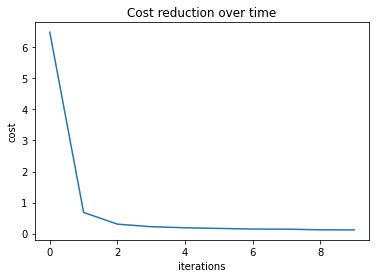

In [15]:
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost reduction over time')
plt.show()

In [16]:
print(w)
print(b)

[[ 0.53098335  0.85875339  0.40873912 -0.12981661  0.45887963 -0.15964714
   0.14948687  2.0709264   0.08167229 -0.33718612 -0.32836829  1.44818616
   0.26093031]]
0.517766716418212


In [17]:
p_hat= hypo(w,x,b)
pred=predict(p_hat,m)

In [18]:
pred

array([[1., 0., 1., ..., 0., 0., 0.]])

In [19]:
y

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [20]:
#validation
xt=test.drop('genre_label',axis=1)
yt=test['genre_label']
xt=scale(xt)
xt=np.array(xt)
yt=np.array(yt)
print("xt",xt.shape)
print("yt",yt.shape)
n=len(xt)
p_hat= hypo(w,xt,b)
pred=predict(p_hat,n)
print("pred_t",pred.shape)
er=error(pred,yt,n)
print(er)

xt (1437, 13)
yt (1437,)
pred_t (1, 1437)
0.13619035001774066


In [21]:
#compute accuracy
n=len(xt)
p_hat= hypo(w,xt,b)
testpred=predict(p_hat,n)
# *****
m=len(x)
p_hat= hypo(w,x,b)
trainpred=predict(p_hat,m)
print('trainpred',trainpred.shape,'y',y.shape)
print('testpred',testpred.shape,'yt',yt.shape)

trainpred (1, 3350) y (3350,)
testpred (1, 1437) yt (1437,)


In [22]:
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(trainpred.T, y))
predxt = predict(testpred,len(xt))
print('Test Accuracy',accuracy_score(testpred.T, yt))

Training Accuracy 0.9898507462686568
Test Accuracy 0.988169798190675


In [39]:
#final prediction #target
test_data=scale(test_data)
t=np.array(test_data)
k=len(t)
p_hat= hypo(w,t,b)
prediction=predict(p_hat,k)
print(prediction.shape)
print(prediction)


(1, 1197)
[[0. 1. 1. ... 0. 0. 0.]]


In [40]:
ids=np.array(sample['Id']) #prepre to submission
print(ids)
print(ids.shape)

[   0    1    2 ... 1194 1195 1196]
(1197,)


In [41]:
prediction=prediction.reshape(prediction.shape[1],)
print(prediction.shape)

(1197,)


In [44]:
e=pd.DataFrame({'Id':ids,'genre_label':prediction})
e.to_csv('genre_class.CSV',encoding='utf-8',index=False)

***